# Glass Identification

# Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
Predict : Type of glass

Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Glass%20Identification/Glass%20Identification.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv")
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [6]:
df.shape

(213, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [9]:
names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
df.columns = names
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [10]:
df.shape

(213, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          213 non-null    int64  
 1   RI          213 non-null    float64
 2   Na          213 non-null    float64
 3   Mg          213 non-null    float64
 4   Al          213 non-null    float64
 5   Si          213 non-null    float64
 6   K           213 non-null    float64
 7   Ca          213 non-null    float64
 8   Ba          213 non-null    float64
 9   Fe          213 non-null    float64
 10  glass_type  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [12]:
df.isnull().sum()

Id            0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
glass_type    0
dtype: int64

In [14]:
df.columns.value_counts()

Id            1
RI            1
Na            1
Mg            1
Al            1
Si            1
K             1
Ca            1
Ba            1
Fe            1
glass_type    1
dtype: int64

In [15]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

2      1
136    1
138    1
139    1
140    1
      ..
76     1
77     1
78     1
79     1
214    1
Name: Id, Length: 213, dtype: int64


1.52152    3
1.51590    3
1.51645    3
1.51761    2
1.51613    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 177, dtype: int64


13.21    5
13.02    5
13.00    5
12.85    4
12.86    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
3.46     1
3.73     1
3.97     1
3.89     1
1.78     1
Name: Mg, Length: 93, dtype: int64


1.54    8
1.19    6
1.56    5
1.29    5
1.43    5
       ..
1.61    1
0.88    1
1.05    1
0.65    1
1.94    1
Name: Al, Length: 117, dtype: int64


72.99    4
73.10    4
72.86    4
73.28    4
73.11    4
        ..
70.57    1
73.81    1
72.92    1
73.55    1
73.61    1
Name: Si, Length: 132, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
   

In [16]:
for i in df.columns:
    print(df[i].nunique())
    print(i)
    print('\n')

213
Id


177
RI


142
Na


93
Mg


117
Al


132
Si


65
K


143
Ca


34
Ba


32
Fe


6
glass_type




In [17]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [18]:
df.skew()

Id            0.000000
RI            1.639658
Na            0.457318
Mg           -1.154323
Al            0.900017
Si           -0.744546
K             6.549276
Ca            2.040591
Ba            3.406749
Fe            1.747173
glass_type    1.108861
dtype: float64

In [26]:
df1=df.drop(['Id'],axis=1)

In [27]:
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


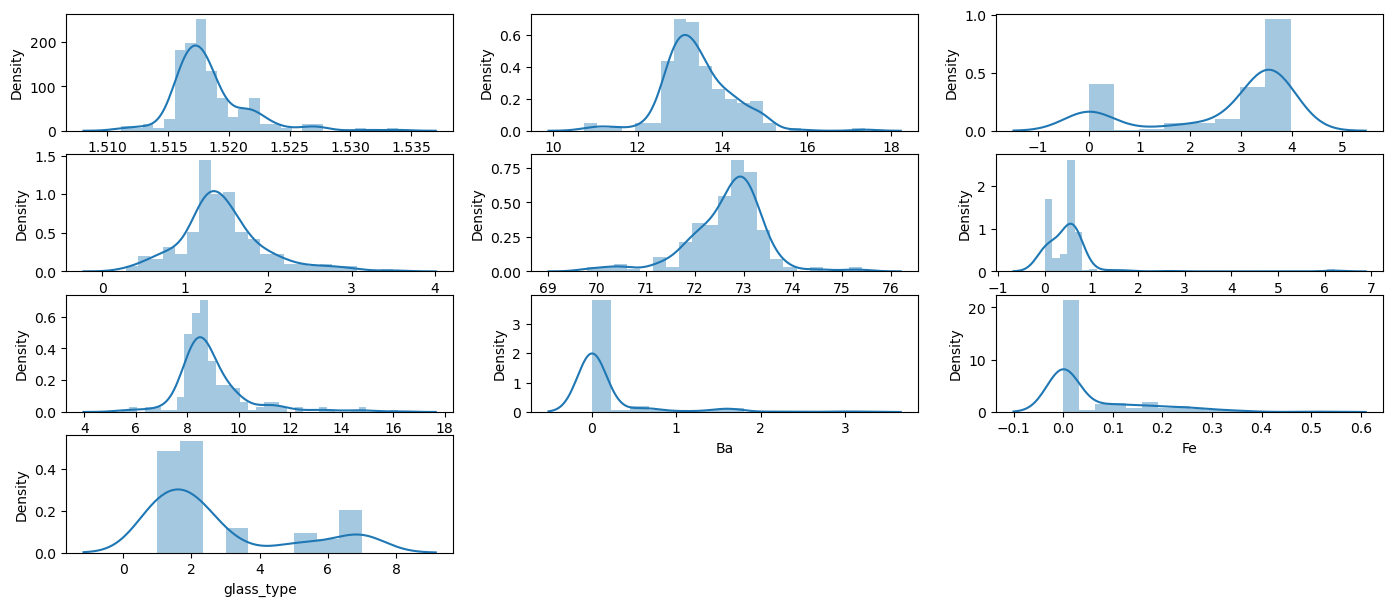

In [29]:
plt.subplots(figsize=(17,7))
for i, col in enumerate(df1.columns):
    plt.subplot(4,3, i + 1)
    sns.distplot(df[col])
plt.show()

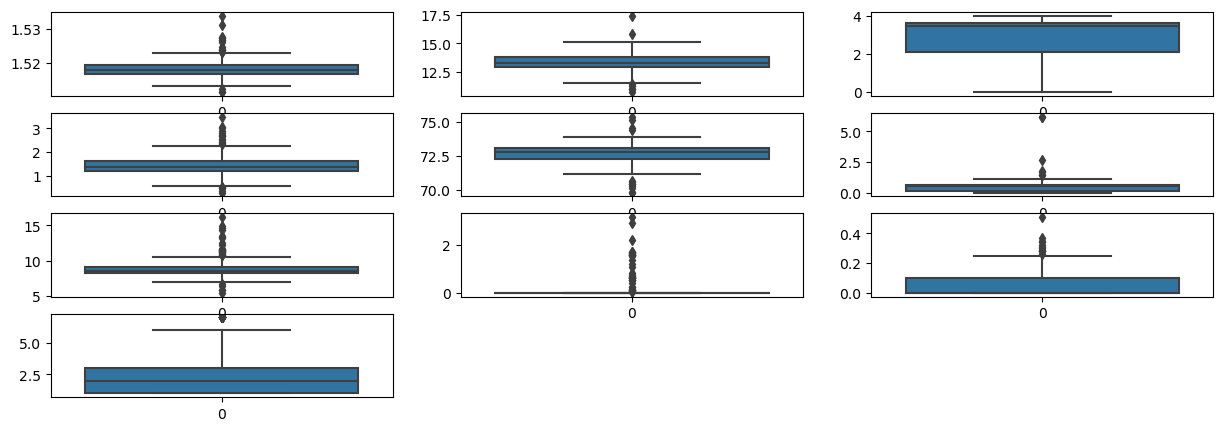

In [31]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(df1.columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(df[col])
plt.show()

In [32]:
from scipy import stats
import numpy as np
for i in df1.columns:
    z = np.abs(stats.zscore(df[i]))
print(z)

0      0.851703
1      0.851703
2      0.851703
3      0.851703
4      0.851703
         ...   
208    2.005192
209    2.005192
210    2.005192
211    2.005192
212    2.005192
Name: glass_type, Length: 213, dtype: float64


In [33]:
threshold = 3
 
# Position of the outlier
print(np.where(z > 3))

(array([], dtype=int64),)


In [34]:
z = np.abs(stats.zscore(df["Ba"]))
print(z)

0      0.353808
1      0.353808
2      0.353808
3      0.353808
4      0.353808
         ...   
208    1.778672
209    2.844912
210    2.945501
211    2.804676
212    3.005854
Name: Ba, Length: 213, dtype: float64


In [35]:
df2=df1[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
207,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7


In [46]:
df2 = df2.rename(columns={'glass type': 'glass_type'})

In [47]:
features= df2.drop(df2.columns[-1],axis=1)

target=df2['glass_type']

In [48]:
target

0      1
1      1
2      1
3      1
4      1
      ..
207    7
208    7
209    7
210    7
211    7
Name: glass_type, Length: 193, dtype: int64

In [49]:
features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
...,...,...,...,...,...,...,...,...,...
207,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00


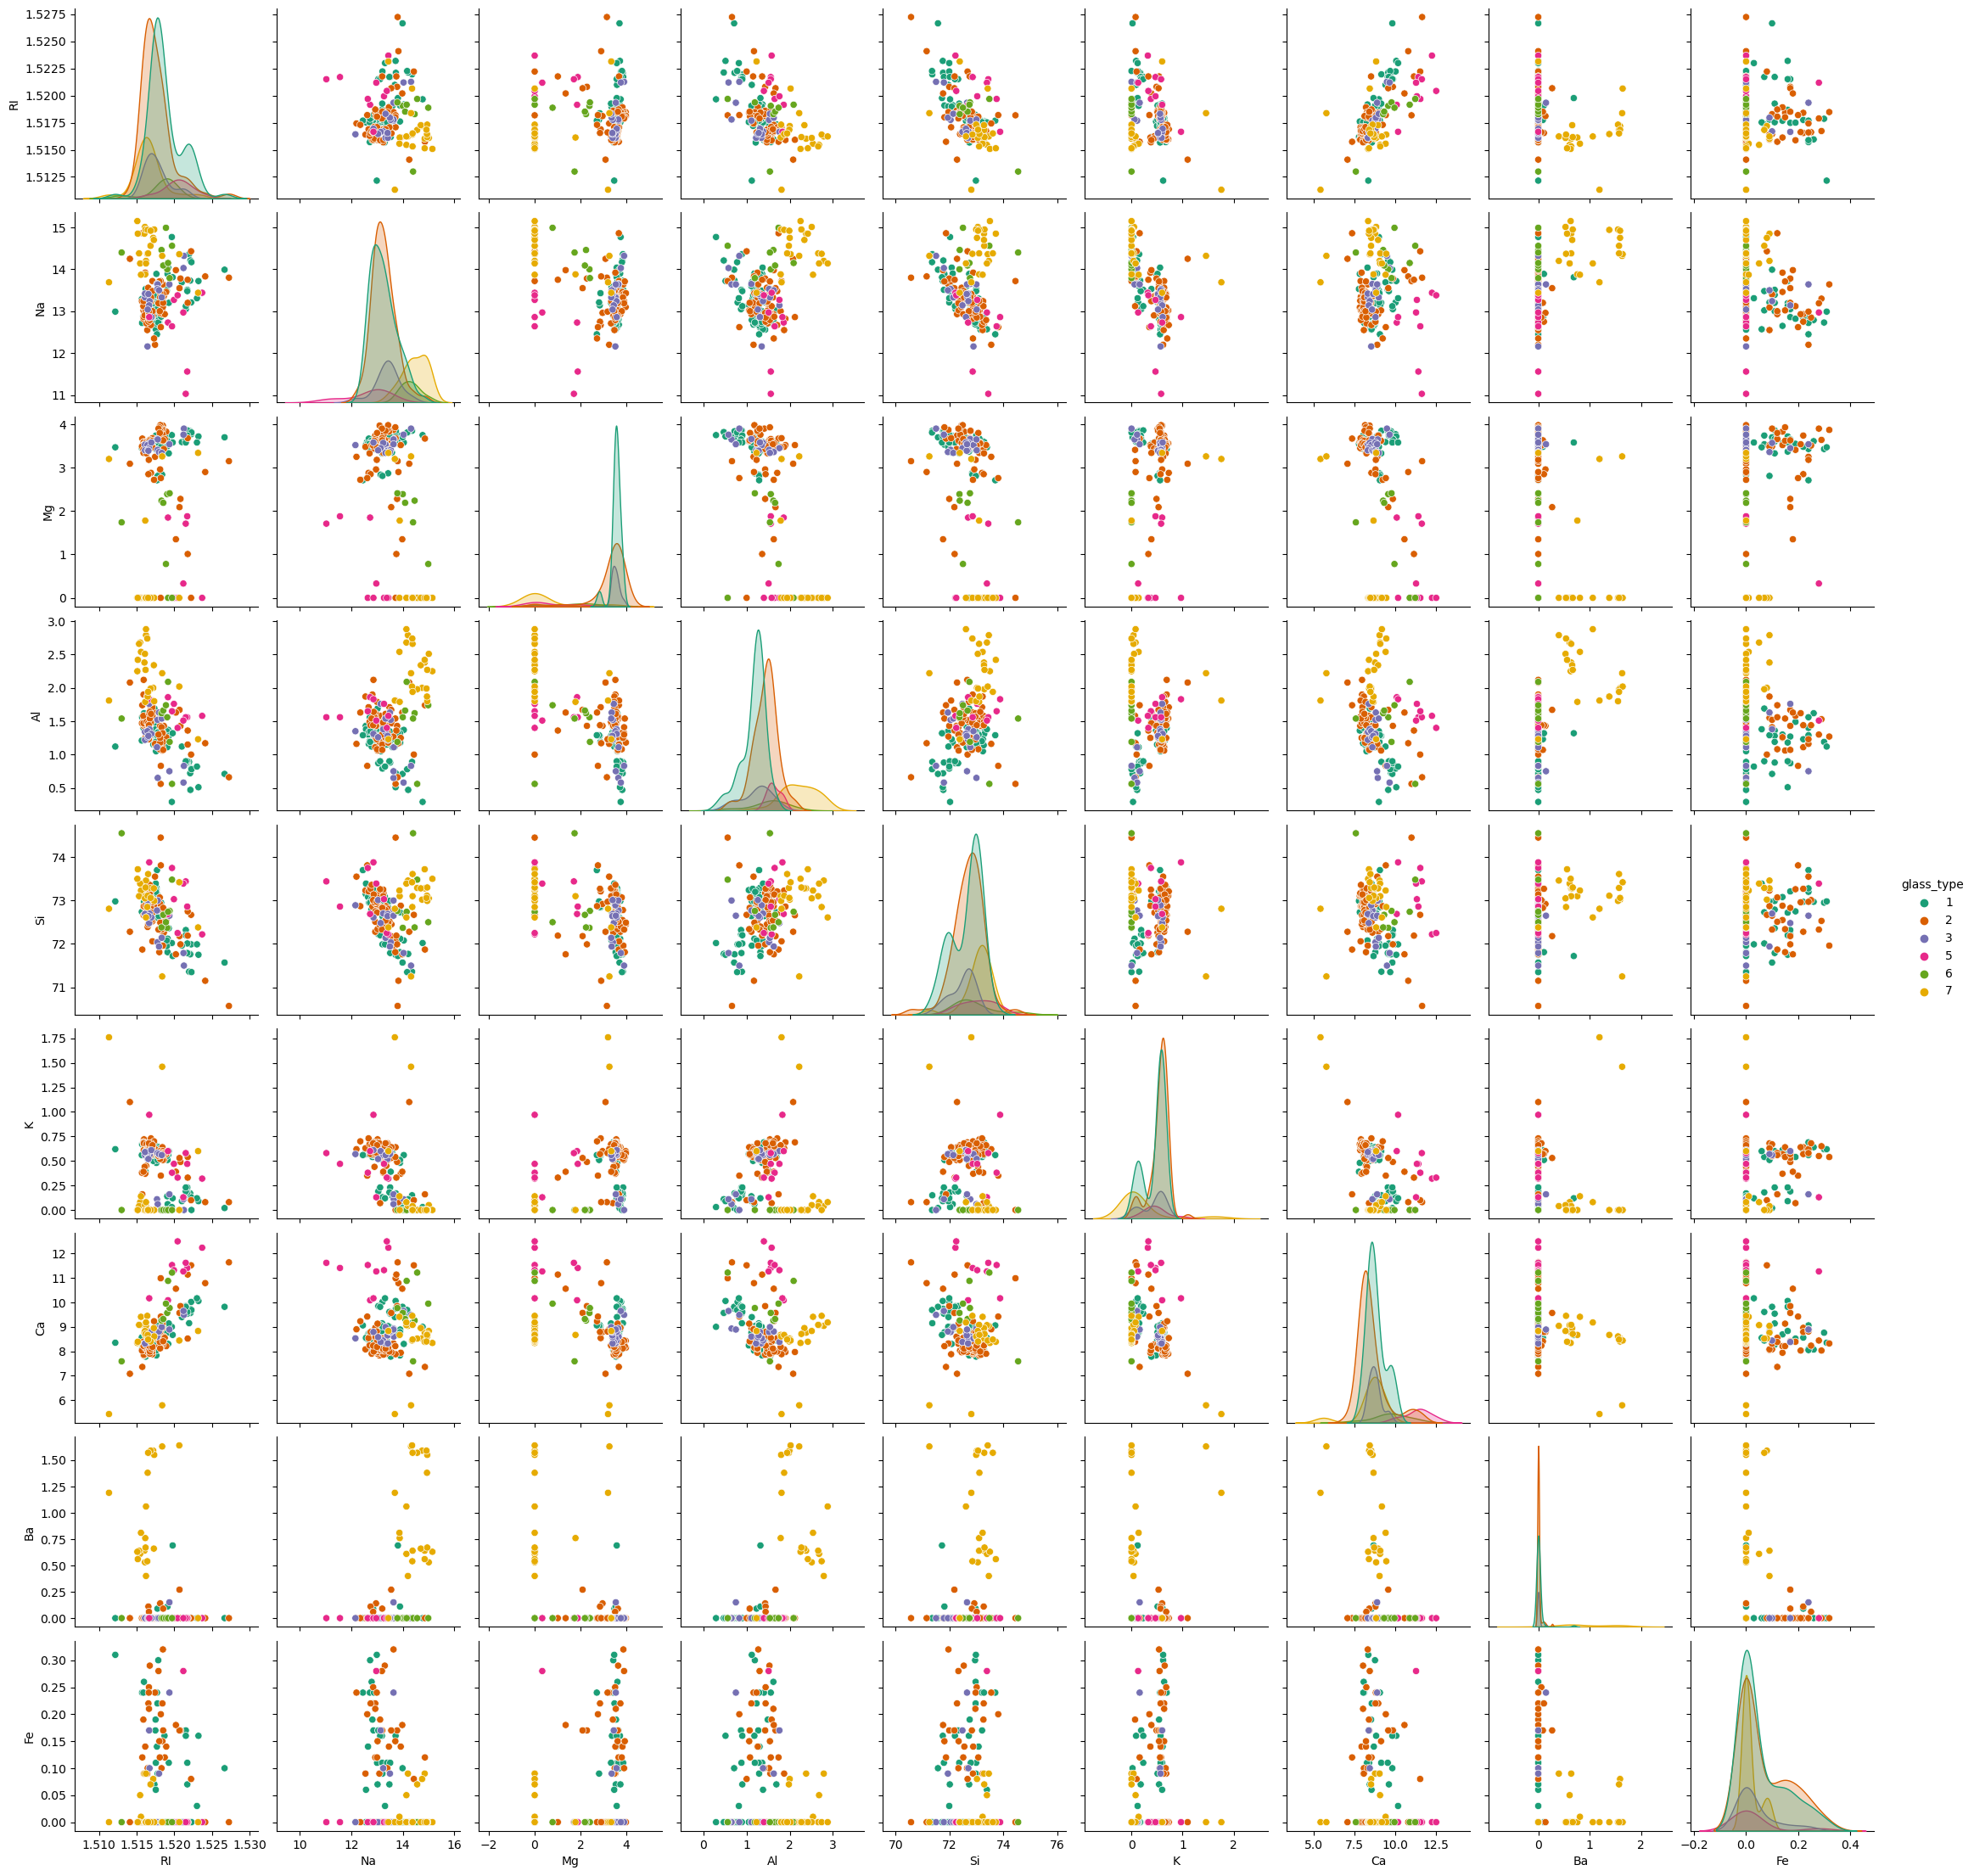

In [53]:
sns.pairplot(df2,hue="glass_type",palette="Dark2")
plt.show()

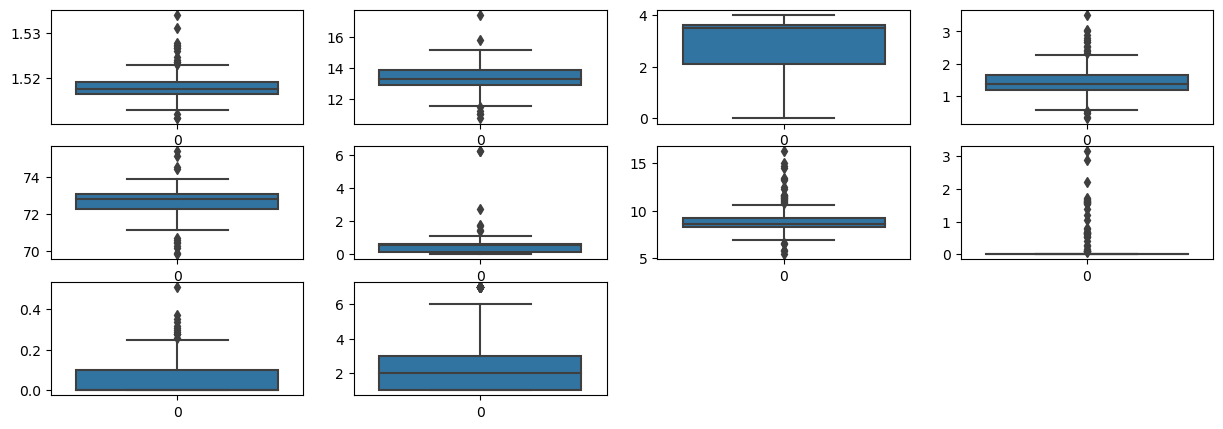

In [54]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(df1.columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(df1[col])
plt.show()

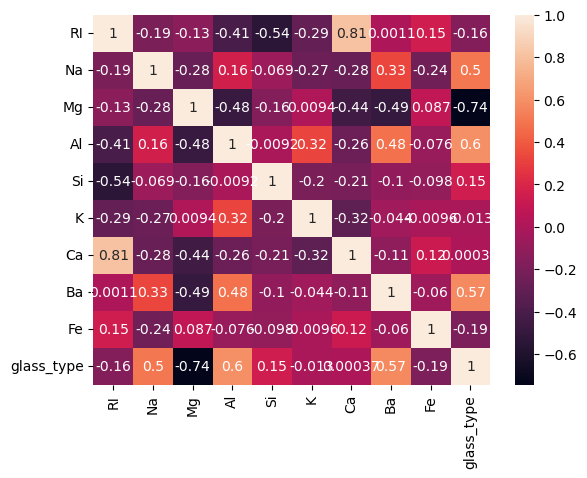

In [55]:
#sns.heatmap(result,annot=labels,fmt="",cmap='RdYlGn',linewidths=0.30,ax=ax)

sns.heatmap(df1.corr(),annot=True)
plt.show()

In [56]:
df1.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
RI,1.000000,-0.193436,-0.128118,-0.405671,-0.540010,-0.287900,0.812495,0.001062,0.145791,-0.161322
Na,-0.193436,1.000000,-0.276486,0.157928,-0.068519,-0.265520,-0.275314,0.327233,-0.240802,0.504983
Mg,-0.128118,-0.276486,1.000000,-0.480035,-0.160359,0.009397,-0.444559,-0.492149,0.086906,-0.744004
Al,-0.405671,0.157928,-0.480035,1.000000,-0.009226,0.324484,-0.260372,0.478936,-0.076456,0.597754
Si,-0.540010,-0.068519,-0.160359,-0.009226,1.000000,-0.197684,-0.210141,-0.104361,-0.097674,0.147767
K,-0.287900,-0.265520,0.009397,0.324484,-0.197684,1.000000,-0.318649,-0.043790,-0.009586,-0.012765
Ca,0.812495,-0.275314,-0.444559,-0.260372,-0.210141,-0.318649,1.000000,-0.113121,0.124674,0.000372
Ba,0.001062,0.327233,-0.492149,0.478936,-0.104361,-0.043790,-0.113121,1.000000,-0.059729,0.574896
Fe,0.145791,-0.240802,0.086906,-0.076456,-0.097674,-0.009586,0.124674,-0.059729,1.000000,-0.191090
glass_type,-0.161322,0.504983,-0.744004,0.597754,0.147767,-0.012765,0.000372,0.574896,-0.191090,1.000000


In [57]:
cor=df1.corr()
cor["glass_type"].sort_values(ascending=False)

glass_type    1.000000
Al            0.597754
Ba            0.574896
Na            0.504983
Si            0.147767
Ca            0.000372
K            -0.012765
RI           -0.161322
Fe           -0.191090
Mg           -0.744004
Name: glass_type, dtype: float64

In [58]:
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve)

In [59]:
X = features 
y = target
# set a seed and a test size for splitting the dataset 
seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = seed)

In [60]:
from sklearn import preprocessing
x=df1.values
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled=min_max_scaler.fit_transform(x)
df1=pd.DataFrame(x_scaled)
df1

,0,1,2,3,4,5,6,7,8,9
0,0.283582,0.475188,0.904523,0.333333,0.521429,0.077295,0.223048,0.000000,0.000000,0.0
1,0.220808,0.421053,0.891960,0.389408,0.567857,0.062802,0.218401,0.000000,0.000000,0.0
2,0.285777,0.372932,0.927136,0.311526,0.500000,0.091787,0.259294,0.000000,0.000000,0.0
3,0.275241,0.381955,0.909548,0.295950,0.583929,0.088567,0.245353,0.000000,0.000000,0.0
4,0.211150,0.309774,0.907035,0.414330,0.564286,0.103060,0.245353,0.000000,0.509804,0.0
...,...,...,...,...,...,...,...,...,...,...
208,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.000000,1.0
209,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.000000,1.0
210,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.000000,1.0
211,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.000000,1.0


In [61]:
df1.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object

In [62]:
df1.head()

,0,1,2,3,4,5,6,7,8,9
0,0.283582,0.475188,0.904523,0.333333,0.521429,0.077295,0.223048,0.0,0.000000,0.0
1,0.220808,0.421053,0.891960,0.389408,0.567857,0.062802,0.218401,0.0,0.000000,0.0
2,0.285777,0.372932,0.927136,0.311526,0.500000,0.091787,0.259294,0.0,0.000000,0.0
3,0.275241,0.381955,0.909548,0.295950,0.583929,0.088567,0.245353,0.0,0.000000,0.0
4,0.211150,0.309774,0.907035,0.414330,0.564286,0.103060,0.245353,0.0,0.509804,0.0


In [63]:
features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
...,...,...,...,...,...,...,...,...,...
207,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00


In [65]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
...,...,...,...,...,...,...,...,...,...
207,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00


In [66]:
y

0      1
1      1
2      1
3      1
4      1
      ..
207    7
208    7
209    7
210    7
211    7
Name: glass_type, Length: 193, dtype: int64

In [70]:
from sklearn.pipeline import Pipeline # streaming pipelines
from collections import Counter
import warnings
# load models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [71]:
maxAcc=0
maxRandomState=0
for i in range(1,300):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    dtc=DecisionTreeClassifier()
    dtc.fit(X_train,y_train)
    dtc_train_predict=dtc.predict(X_train)
    dtc_test_predict=dtc.predict(X_test)
    #Train Accuracy ,accuracy_score(y_train,dtc_train_predict)*100)
    Accuracy =accuracy_score(y_test,dtc_test_predict)
    if Accuracy>maxAcc:
        maxAcc=Accuracy
        maxRandomScore=i
print("Max Accuracy is-",maxAcc," on random state -", maxRandomScore)

Max Accuracy is- 0.8717948717948718  on random state - 241


In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=maxRandomState)

In [73]:
x_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
145,1.51769,13.65,3.66,1.11,72.77,0.11,8.60,0.00,0.00
8,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11
185,1.51838,14.32,3.26,2.22,71.25,1.46,5.79,1.63,0.00
142,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00
138,1.51674,12.87,3.56,1.64,73.14,0.65,7.99,0.00,0.00
...,...,...,...,...,...,...,...,...,...
103,1.52410,13.83,2.90,1.17,71.15,0.08,10.79,0.00,0.00
67,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16
123,1.52177,13.20,3.68,1.15,72.75,0.54,8.52,0.00,0.00
47,1.52223,13.21,3.77,0.79,71.99,0.13,10.02,0.00,0.00


In [74]:
x_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
117,1.51673,13.30,3.64,1.53,72.53,0.65,8.03,0.00,0.29
141,1.51662,12.85,3.51,1.44,73.01,0.68,8.23,0.06,0.25
44,1.51900,13.49,3.48,1.35,71.95,0.55,9.00,0.00,0.00
129,1.52177,13.75,1.01,1.36,72.19,0.33,11.14,0.00,0.00
168,1.51994,13.27,0.00,1.76,73.03,0.47,11.32,0.00,0.00
124,1.51872,12.93,3.66,1.56,72.51,0.58,8.55,0.00,0.12
18,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
195,1.51556,13.87,0.00,2.54,73.23,0.14,9.41,0.81,0.01
154,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.00,0.00
7,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00


In [75]:
y_train

145    3
8      1
185    7
142    2
138    2
      ..
103    2
67     1
123    2
47     1
186    7
Name: glass_type, Length: 154, dtype: int64

In [76]:
y_test

117    2
141    2
44     1
129    2
168    5
124    2
18     1
195    7
154    3
7      1
5      1
133    2
169    5
119    2
80     2
55     1
56     1
37     1
147    3
71     2
33     1
86     2
112    2
163    5
66     1
189    7
177    6
22     1
194    7
164    5
98     2
4      1
197    7
199    7
45     1
137    2
26     1
96     2
149    3
Name: glass_type, dtype: int64

In [77]:
x_train.shape,y_train.shape

((154, 9), (154,))

In [78]:
x_test.shape,y_test.shape

((39, 9), (39,))

# Model selection

In [79]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_train_predict=dtc.predict(x_train)
dtc_test_predict=dtc.predict(x_test)

In [80]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [81]:
print('Train Accuracy ',accuracy_score(y_train,dtc_train_predict)*100)
print('Test Accuracy ',accuracy_score(y_test,dtc_test_predict))

Train Accuracy  100.0
Test Accuracy  0.5897435897435898


In [82]:
print(confusion_matrix(y_test,dtc_test_predict))

[[11  2  0  0  0  0]
 [ 6  5  1  1  0  0]
 [ 0  2  1  0  0  0]
 [ 1  3  0  0  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  5]]


In [83]:
print(classification_report(y_test,dtc_test_predict,digits=4))

              precision    recall  f1-score   support

           1     0.6111    0.8462    0.7097        13
           2     0.4167    0.3846    0.4000        13
           3     0.5000    0.3333    0.4000         3
           5     0.0000    0.0000    0.0000         4
           6     1.0000    1.0000    1.0000         1
           7     1.0000    1.0000    1.0000         5

    accuracy                         0.5897        39
   macro avg     0.5880    0.5940    0.5849        39
weighted avg     0.5349    0.5897    0.5545        39



In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_train_predict=rfc.predict(x_train)
rfc_test_predict=rfc.predict(x_test)

In [85]:
print('Train Accuracy ',accuracy_score(y_train,rfc_train_predict)*100)
print('Test Accuracy ',accuracy_score(y_test,rfc_test_predict))

Train Accuracy  100.0
Test Accuracy  0.7948717948717948


In [86]:
print(confusion_matrix(y_test,rfc_test_predict))

[[11  2  0  0  0  0]
 [ 3 10  0  0  0  0]
 [ 0  2  1  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  5]]


In [87]:
print(classification_report(y_test,rfc_test_predict,digits=4))

              precision    recall  f1-score   support

           1     0.7857    0.8462    0.8148        13
           2     0.6667    0.7692    0.7143        13
           3     1.0000    0.3333    0.5000         3
           5     1.0000    0.7500    0.8571         4
           6     1.0000    1.0000    1.0000         1
           7     1.0000    1.0000    1.0000         5

    accuracy                         0.7949        39
   macro avg     0.9087    0.7831    0.8144        39
weighted avg     0.8175    0.7949    0.7899        39



In [88]:
from sklearn.svm import SVC

In [89]:
svc=SVC(probability=True)
svc.fit(x_train,y_train)
svc_train_predict=svc.predict(x_train)
svc_test_predict=svc.predict(x_test)

In [90]:
print('Train Accuracy ',accuracy_score(y_train,svc_train_predict)*100)
print('Test Accuracy ',accuracy_score(y_test,svc_test_predict))

Train Accuracy  36.36363636363637
Test Accuracy  0.3333333333333333


In [91]:
print(confusion_matrix(y_test,svc_test_predict))

[[13  0  0  0  0  0]
 [13  0  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 4  0  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 5  0  0  0  0  0]]


In [92]:
print(classification_report(y_test,svc_test_predict,digits=4))

              precision    recall  f1-score   support

           1     0.3333    1.0000    0.5000        13
           2     0.0000    0.0000    0.0000        13
           3     0.0000    0.0000    0.0000         3
           5     0.0000    0.0000    0.0000         4
           6     0.0000    0.0000    0.0000         1
           7     0.0000    0.0000    0.0000         5

    accuracy                         0.3333        39
   macro avg     0.0556    0.1667    0.0833        39
weighted avg     0.1111    0.3333    0.1667        39



In [93]:
from sklearn.svm import SVC

In [94]:
svc=SVC(probability=True)
svc.fit(x_train,y_train)
svc_train_predict=svc.predict(x_train)
svc_test_predict=svc.predict(x_test)

In [95]:
print('Train Accuracy ',accuracy_score(y_train,svc_train_predict)*100)
print('Test Accuracy ',accuracy_score(y_test,svc_test_predict))

Train Accuracy  36.36363636363637
Test Accuracy  0.3333333333333333


In [96]:
print(confusion_matrix(y_test,svc_test_predict))


[[13  0  0  0  0  0]
 [13  0  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 4  0  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 5  0  0  0  0  0]]


In [97]:
print(classification_report(y_test,svc_test_predict,digits=4))

              precision    recall  f1-score   support

           1     0.3333    1.0000    0.5000        13
           2     0.0000    0.0000    0.0000        13
           3     0.0000    0.0000    0.0000         3
           5     0.0000    0.0000    0.0000         4
           6     0.0000    0.0000    0.0000         1
           7     0.0000    0.0000    0.0000         5

    accuracy                         0.3333        39
   macro avg     0.0556    0.1667    0.0833        39
weighted avg     0.1111    0.3333    0.1667        39



In [98]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_train_predict=abc.predict(x_train)
abc_test_predict=abc.predict(x_test)

In [99]:
print('Train Accuracy ',accuracy_score(y_train,svc_train_predict)*100)
print('Test Accuracy ',accuracy_score(y_test,svc_test_predict))

Train Accuracy  36.36363636363637
Test Accuracy  0.3333333333333333


In [100]:
print(confusion_matrix(y_test,svc_test_predict))

[[13  0  0  0  0  0]
 [13  0  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 4  0  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 5  0  0  0  0  0]]


In [101]:
print(classification_report(y_test,svc_test_predict,digits=4))

              precision    recall  f1-score   support

           1     0.3333    1.0000    0.5000        13
           2     0.0000    0.0000    0.0000        13
           3     0.0000    0.0000    0.0000         3
           5     0.0000    0.0000    0.0000         4
           6     0.0000    0.0000    0.0000         1
           7     0.0000    0.0000    0.0000         5

    accuracy                         0.3333        39
   macro avg     0.0556    0.1667    0.0833        39
weighted avg     0.1111    0.3333    0.1667        39



In [102]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
etc_train_predict=etc.predict(x_train)
etc_test_predict=etc.predict(x_test)

In [103]:
print('Train Accuracy ',accuracy_score(y_train,svc_train_predict)*100)
print('Test Accuracy ',accuracy_score(y_test,svc_test_predict))

Train Accuracy  36.36363636363637
Test Accuracy  0.3333333333333333


In [104]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_train_predict=gbc.predict(x_train)
gbc_test_predict=gbc.predict(x_test)

In [105]:
print('Train Accuracy ',accuracy_score(y_train,svc_train_predict)*100)
print('Test Accuracy ',accuracy_score(y_test,svc_test_predict))

Train Accuracy  36.36363636363637
Test Accuracy  0.3333333333333333


In [106]:
# RandomForestClassifier is best model for accuracy

In [108]:
#Building the predictive system
input_data=(1.51719,14.75,0.00,2.00,73.02,0.00,8.53,1.59,0.08)#input the data from csv
input_data_as_array=np.asarray(input_data)#convet in  to numpy array
input_data_reshape=input_data_as_array.reshape(1,-1)# reshaping
prediction=rfc.predict(input_data_reshape)
print(prediction)

[7]
